<a href="https://colab.research.google.com/github/efazel/facing-imbalanced-data/blob/master/facing_imbalanced_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facing Imbalanced Binary Data 
by Ehsan Fazel

## The Classification Model

Consider a simple linear regression model:

$$y^{(i)} = \alpha + \beta x^{(i)} + \epsilon^{(i)} \tag{1}$$

where $\alpha$ and $\beta$ are the coefficients of the model. You can also think of $\alpha$ as bias and $\beta$ as the vector of weights. Estimating the above model by gradient descent would yield predicted values, $\hat{y}^{(i)}$, that belong to the set of real numbers. But what if our input data, ${y}^{(i)}$ is binary and we are interested in obtaining 0/1 predicted values? In such circumstances, one can transfer the model by a sigmoid (or logistic) function.

$$ A(\alpha + \beta x^{(i)}) = \frac{1}{1+e^{-\alpha -\beta x^{(i)}}} \tag{2}$$

where $A(.)$ is the sigmoid activation function. In a single layer shallow neural network this activation is equal to the predicted values $\hat{y}^{(i)}$. To see how the sigmoid actiavtion function transforms the data, let us define the following:

In [1]:
# Import Numpy and Matplotlib:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Sigmoid activation function: 
def sigmoid(a):
    """
    Inputs:
    a: a scalar or an array of an arbitrary size

    Outputs:
    s: sigmoid(a)
    """
    s = 1/(1+np.exp(-a))
    return s

To plot the sigmoid function for an example, we create an array named *a* that covers the interval between 10 and -10 with steps of 0.1. 

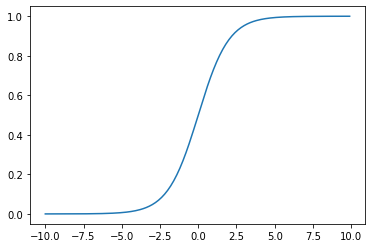

In [3]:
# declare a as a numpy array from -10 to 10:
a = np.arange(-10., 10., 0.1)
s = sigmoid(a)
plt.plot(a,s);

The graph clearly shows the importance of the range of y in interpreting the results of the classification problem.
By imposing the sigmoid transformation, we will have the following loss, cost and log likelihood functions:

$$ \mathcal{l}(\hat{y}^{(i)},y^{(i)}) = -y^{(i)}\log(\hat{y}^{(i)})-(1-y^{(i)})log(1- \hat{y}^{(i)}) \tag{3}$$

$$ \mathcal{J}(\hat{y}^{(i)},y^{(i)}) = \frac{1}{n} \sum_{i=1}^n \mathcal{l}(\hat{y}^{(i)},y^{(i)}) \tag{4}$$

$$\mathcal{L}(\hat{y}^{(i)},y^{(i)}) = \sum_{i=1}^n y^{(i)}\log(\hat{y}^{(i)})+(1-y^{(i)})log(1- \hat{y}^{(i)}) \tag{5}$$

If we initialize the parameters and run the gradient descent routine for a set of iterations, the optimal $\alpha$ and $\beta$ will be obtained through forward and backward propagations. This will enable us to predict the values. 

## COVID-19 Patient Pre-condition Dataset

Before introducing the data, we should talk about the concept of imbalanced data. Here, we focus on the binary variable $y^{(i)}$ which takes values of 1 and 0. If the frequency of observing either 1 or 0 is substantially different from the other, we can say that we have an imbalanced data. We will see an example later on, but generally, any ratio that is less balanced than 40/60 could be a candidate (e.g. 40% 1 vs. 60% 0). 

It is very common to come across imbalanced data in cases where the occurrence of the binary variable is quite rare. Fraudulent transactions and cancer diagnosis are among these cases. The data-set that we will be using is the data for COVID-19 tested individuals from Mexico, available in Kaggle. The data consists of different features (mostly binary variables) that could be used in a model to investigate the deaths associated with COVID-19.

To start the empirical analysis, you should first download the data from Kaggle and upload it below.

In [ ]:
# Upload the json file:
from google.colab import files
files.upload()

You can use os to directly download the dataset. Make sure to put the username and the key from the json file.

In [5]:
# upload the data from Kaggle. The name of the dataset is: "covid19-patient-precondition-dataset"
import os
os.environ['KAGGLE_USERNAME'] = "XXXX" # username from the json file
os.environ['KAGGLE_KEY'] = "XXXXXXXXXXXXXXXXXXXXX" # key from the json file
!kaggle datasets download -d tanmoyx/covid19-patient-precondition-dataset # api copied from kaggle

 66% 5.00M/7.56M [00:00<00:00, 16.4MB/s]
100% 7.56M/7.56M [00:00<00:00, 21.6MB/s]


To unzip the data, import ZipFile from zipfile.

In [6]:
# unzip the data:
from zipfile import ZipFile
file_name = "covid19-patient-precondition-dataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


Now the csv file is located in the directory and we can start importing and analyzing it. To create a data frame and manipulate the matrices, we can use Pandas. So let's import them and read the data.

In [7]:
# Import Pandas:
import pandas as pd

In [8]:
# read the data
df = pd.read_csv("covid.csv").copy()

# take a quick look at the head
print(df.head())

       id  sex  patient_type  ... contact_other_covid covid_res icu
0  16169f    2             1  ...                   2         1  97
1  1009bf    2             1  ...                  99         1  97
2  167386    1             2  ...                  99         1   2
3  0b5948    2             2  ...                  99         1   2
4  0d01b5    1             2  ...                  99         1   2

[5 rows x 23 columns]


To briefly examine the data frame, we can check the list of features, missing values, and data types.

In [9]:
# check the data types and missing values:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

We would like to build a model that can classify the deaths due to the virus. By a simple feature extraction, we only consider one candidate. Deaths can be recovered from the variable *date_died* which presents the date when the individual has passed away. We are going to place our focus on individuals who tested positive and passed away. So there would be an assumption that they died because of the virus. By considering the deceased, we can then investigate the role of variables such as asthma on the probability of the individual loses life given tested positive. To investigate this statement, first, we need to create a dummy variable based on date_died.

In [10]:
# examine the unique values of date_died
print(df["date_died"].unique())

['9999-99-99' '22-04-2020' '29-04-2020' '21-05-2020' '28-04-2020'
 '26-04-2020' '07-04-2020' '13-04-2020' '20-04-2020' '25-04-2020'
 '19-06-2020' '06-04-2020' '15-05-2020' '13-05-2020' '09-06-2020'
 '08-05-2020' '24-04-2020' '03-05-2020' '15-04-2020' '16-04-2020'
 '30-03-2020' '30-04-2020' '14-06-2020' '19-04-2020' '14-05-2020'
 '07-05-2020' '28-03-2020' '16-05-2020' '09-04-2020' '18-05-2020'
 '05-04-2020' '21-04-2020' '01-06-2020' '15-06-2020' '18-04-2020'
 '05-06-2020' '20-05-2020' '09-05-2020' '11-05-2020' '04-05-2020'
 '10-05-2020' '05-05-2020' '23-04-2020' '22-05-2020' '27-04-2020'
 '02-05-2020' '12-05-2020' '21-06-2020' '17-05-2020' '26-05-2020'
 '04-06-2020' '11-06-2020' '06-05-2020' '19-05-2020' '25-05-2020'
 '17-04-2020' '01-04-2020' '29-03-2020' '14-04-2020' '11-04-2020'
 '01-05-2020' '16-06-2020' '26-06-2020' '27-05-2020' '23-05-2020'
 '22-03-2020' '03-06-2020' '03-04-2020' '24-05-2020' '08-04-2020'
 '02-04-2020' '30-05-2020' '31-05-2020' '12-04-2020' '23-06-2020'
 '06-06-20

Before moving on with preprocessing *date_died*, we examine another variable, *covid_res*. This variable reports the cornavirus test results.

In [11]:
df['covid_res'].unique()

array([1, 2, 3])

The following code will remove the pending test results from the set and transform *covid_res* into a 0/1 variable.

In [12]:
# remove pending test results:
df = df[df["covid_res"] != 3]

# convert negatives to zero:
df.loc[df['covid_res'] == 2,'covid_res'] = 0
print(df.head())
print(df.tail())

# check the binary variable:
print("The test result is shown by variable covid_res whcih is an array of " + str(df['covid_res'].unique()))

       id  sex  patient_type  ... contact_other_covid covid_res icu
0  16169f    2             1  ...                   2         1  97
1  1009bf    2             1  ...                  99         1  97
2  167386    1             2  ...                  99         1   2
3  0b5948    2             2  ...                  99         1   2
4  0d01b5    1             2  ...                  99         1   2

[5 rows x 23 columns]
            id  sex  patient_type  ... contact_other_covid covid_res icu
499687  1342ee    2             1  ...                   2         0  97
499688  0186c8    2             2  ...                   2         0   2
499689  130373    1             1  ...                   2         0  97
499690  10b265    1             1  ...                   1         0  97
499691  197252    1             1  ...                  99         0  97

[5 rows x 23 columns]
The test result is shown by variable covid_res whcih is an array of [1 0]


We consider individuals who tested positive and passed away to isolate deaths and study further causes. Thus, the assumption that the deaths are caused by the virus is imposed. By concentrating on the deceased population, we can then investigate the role of variables such as *asthma* on the probability of the individual loses life given tested positive. To check this statement, first, we need to create another dummy variable based on *date_died*. And do the same for some selected features that we would like to study.

For *date_died* if we observe the string "9999-99-99", it is an indication of patient that the patient is still alive. Thus by removing rows with such values, we end up with the deceased population. Since it might be the case that among this group some patients had tested negative, we should only consider positive cases. 

In [13]:
# convert date_died with values "9999-99-99" to zero and set rest to one:
df["deceased"] = np.where(df["date_died"].isin(["9999-99-99"]), 0, 1)

# keep only tested postive deceased
df = df[df["covid_res"] != 0]

# convert variables in asthma. 2,98 -> 0. 1 -> 1. 
df["asthma_binary"] = np.where(df["asthma"].isin([2, 98]), 0, 1)

# convert variables in cardiovascular. 2,98 -> 0. 1 -> 1. 
df["cardiovascular_binary"] = np.where(df["cardiovascular"].isin([2, 98]), 0, 1)

# convert variables in tobacco. 2,98 -> 0. 1 -> 1. 
df["tobacco_binary"] = np.where(df["tobacco"].isin([2, 98]), 0, 1)

To begin with, we only consider *asthma*, *cardiovascular*, and *tobacco*. Let's put them together in a new data frame called *df_reduced*. 

In [14]:
df_reduced = pd.concat([df['asthma_binary'], df['cardiovascular_binary'], df['tobacco_binary']], axis = 1)
deceased = df['deceased']
print(df_reduced)

        asthma_binary  cardiovascular_binary  tobacco_binary
0                   0                      0               0
1                   0                      0               0
2                   0                      0               0
3                   0                      0               0
4                   0                      1               0
...               ...                    ...             ...
220652              0                      0               0
220653              0                      0               0
220654              0                      0               0
220655              1                      0               0
220656              0                      0               0

[220657 rows x 3 columns]


Now it's time to split the data into train and test sets. 

In [15]:
# Import Sklearn to split the data
from sklearn.model_selection import train_test_split

In [16]:
# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(df_reduced, df['deceased'], test_size=0.2, random_state=42)
df_train = pd.concat([x_train, y_train], axis = 1)
df_test = pd.concat([x_test, y_test], axis = 1)

We are interested in examining the effect of medical conditions such as asthma on the probability of the individuals losing their lives. To do so we can start with investigating the Phi coefficient. The Phi coefficient measures the correlation between two binary variables. This might seem unusual after splitting the data, but for now, we only pick the variable with the highest coefficient and model that single variable in a classification model.

In [20]:
# Import Mattews Correlation from Sklearn Metrics:
from sklearn.metrics import matthews_corrcoef

In [21]:
mcc_deceased_asthma_banary = matthews_corrcoef(df_train['deceased'], df_train['asthma_binary'], sample_weight=None)
mcc_deceased_cardiovascular_binary = matthews_corrcoef(df_train['deceased'], df_train['cardiovascular_binary'], sample_weight=None)
mcc_deceased_tobacco_binary = matthews_corrcoef(df_train['deceased'], df_train['tobacco_binary'], sample_weight=None)

print("The correlation between deceased and asthma is: " + str(mcc_deceased_asthma_banary))
print("The correlation between deceased and cardiovascular is: " + str(mcc_deceased_cardiovascular_binary))
print("The correlation between deceased and tobacco is: " + str(mcc_deceased_tobacco_binary))

The correlation between deceased and asthma is: -0.015917242686969695
The correlation between deceased and cardiovascular is: 0.07398438650923728
The correlation between deceased and tobacco is: 0.015918791462454937


It appears that *cardiovascular* has the highest coefficient. Therefore, we will run a logit model with an explanatory variable which the heart disease.

## The Logistic Regression Classifier 


Using the sklearn *LogisticRegression* yields the following:

In [22]:
# Import logistic regression from sklearn:
from sklearn.linear_model import LogisticRegression

In [23]:
# run the logistic regression. Regress deceased on cardiovascular_binary:
logit_model1 = LogisticRegression(random_state = 42)
logit_model1.fit(df_train['cardiovascular_binary'].values.reshape(-1, 1), df_train['deceased'].values.reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

To examine the performance of the classifier there are a few metrics available in sklearn. We are going to consider the confusion matrix, accuracy score, precision score, recall, and F1 score. 

In [24]:
# Import metrics to analyse the performance of the classification:
from sklearn import metrics

In [25]:
# predict the test set:
y_pred = logit_model1.predict(x_test['cardiovascular_binary'].values.reshape(-1, 1))

# Obtain the The Confusion Matrix and Accuracy :
y_pred = np.round(y_pred)
CM = metrics.confusion_matrix(y_test, y_pred)
print(CM)
AS = metrics.accuracy_score(y_test, y_pred)
print('The accuracy score of the classification is: ' + str(AS))
PS = metrics.precision_score(y_test, y_pred, zero_division = 'warn')
print('The precision score of the classification is: ' + str(PS))
RC = metrics.recall_score(y_test, y_pred)
print('The recall score of the classification is: ' + str(RC))
F1 = metrics.f1_score(y_test, y_pred, average = None)
print('The F1 score of the classification is: ' + str(F1))

[[38736     0]
 [ 5396     0]]
The accuracy score of the classification is: 0.8777304450285507
The precision score of the classification is: 0.0
The recall score of the classification is: 0.0
The F1 score of the classification is: [0.93488439 0.        ]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The first anomaly is present in the confusion matrix. The classifier gives no false negatives and no true negatives. Plus the precision score is not-defined. Remember that negative is deceased. This suggests that the model trains a highly imbalanced data set in favor of not-deceased individuals and the ratio between the two classes is completely out of proportion.The positives are the minority class, thus we get more false positives than false negatives which lowers the precision. 

We use the Kappa score to compare the rating of two classifiers. Here the first classifier is our prediction obtained by the logistic regression, while the second is the labeled data in the test set. The order of the inputs in Kappa does not matter. Since it treats both as two equal rating mechanisms. Kappa controls the accuracy of the classifier. Comparing Kappa with the confusion matrix suggests a poor classification.  

In [71]:
KS = metrics.cohen_kappa_score(y_test, y_pred)
print('The Kappa score of the classification is: ' + str(KS))

The Kappa score of the classification is: 0.0


## Suspecting Imbalanced Data

The data is prone to being imbalanced. So let's explore this concept in the data. Considering the training data, we can plot the frequencies of our binary variable "deceased".

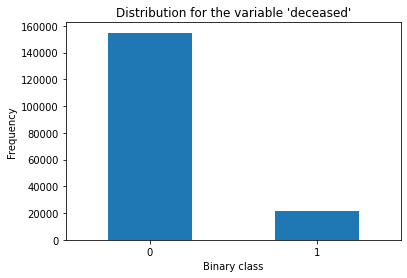

In [26]:
count_y = pd.value_counts(y_train, sort = True)
count_y.plot(kind = 'bar', rot = 0)
plt.title("Distribution for the variable 'deceased'")
plt.xlabel('Binary class')
plt.ylabel('Frequency');

The plot demonstrates the ratio between the two classes. To get a better understanding of the ratio between the two, we can obtain calculate it: 

In [34]:
# Calculate the ratio of deceased to not_deceased
one_to_zero_ratio = y_train[y_train == 1].shape[0]/y_train[y_train == 0].shape[0]
print('The ratio of non_deceased to deceased is: ' + str(zero_to_one_ratio))

The ratio of non_deceased to deceased is: 0.14034237726098192


## Performing Under-sampling

Under-sampling is a technique that can be used when facing an imbalanced data. It goes over the training the data and create a sample in which the ratio of 1/0 in the target variable is balanced. 

In [36]:
# Import the library:
from imblearn.under_sampling import NearMiss

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [37]:
# Create a sample from the training data and store them in data frames (this might take a few seconds):
us = NearMiss(random_state = 42)
x_train_resample, y_train_resample = us.fit_sample(x_train, y_train)
x_train_resample_df = pd.DataFrame(x_train_resample, columns = ['asthma_binary', 'cardiovascular_binary', 'tobacco_binary'])
y_train_resample_df = pd.DataFrame(y_train_resample, columns = ['deceased'])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


We continue with our usual classification algorithm:

In [46]:
# Perform the logistic regression:
train_resample = [x_train_resample_df['cardiovascular_binary'], y_train_resample_df['deceased']]
logit_model2 = LogisticRegression(random_state = 42)
logit_model2.fit(x_train_resample_df['cardiovascular_binary'].values.reshape(-1, 1), y_train_resample_df['deceased'].values.reshape(-1, 1).ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
# predict the test set:
y_pred = logit_model2.predict(x_test['cardiovascular_binary'].values.reshape(-1, 1))

# Obtain the The Confusion Matrix and Accuracy :
y_pred = np.round(y_pred)
CM = metrics.confusion_matrix(y_test, y_pred)
print(CM)
AS = metrics.accuracy_score(y_test, y_pred)
print('The accuracy score of the classification is: ' + str(AS))
PS = metrics.precision_score(y_test, y_pred, zero_division = 'warn')
print('The precision score of the classification is: ' + str(PS))
RC = metrics.recall_score(y_test, y_pred)
print('The recall score of the classification is: ' + str(RC))
F1 = metrics.f1_score(y_test, y_pred, average = None)
print('The F1 score of the classification is: ' + str(F1))

[[38017   719]
 [ 5124   272]]
The accuracy score of the classification is: 0.867601740233844
The precision score of the classification is: 0.27447023208879917
The recall score of the classification is: 0.050407709414381024
The F1 score of the classification is: [0.92863686 0.08517301]


As it is shown by the results, by undersampling we can achieve some improvement.

## Re-run Logistic with Class-weights

Another way to address the imbalanced target variable is to put an extra argument in *LogisticRegression* for *class_weigh*. We already calculated the weights so we can directly put them in the function, run the logistic, and obtain similar results like the ones in undersampling. 

In [47]:
# run the logistic regression. Regress deceased on cardiovascular_binary, but specify the class weights:
logit_model3 = LogisticRegression(random_state = 42, class_weight = {0:0.14})
logit_model3.fit(df_train['cardiovascular_binary'].values.reshape(-1, 1), df_train['deceased'].values.reshape(-1, 1).ravel())

y_pred = logit_model3.predict(x_test['cardiovascular_binary'].values.reshape(-1, 1))

# Obtain the The Confusion Matrix and Accuracy :
y_pred = np.round(y_pred)
CM = metrics.confusion_matrix(y_test, y_pred)
print(CM)
AS = metrics.accuracy_score(y_test, y_pred)
print('The accuracy score of the classification is: ' + str(AS))
PS = metrics.precision_score(y_test, y_pred, zero_division = 'warn')
print('The precision score of the classification is: ' + str(PS))
RC = metrics.recall_score(y_test, y_pred)
print('The recall score of the classification is: ' + str(RC))
F1 = metrics.f1_score(y_test, y_pred, average = None)
print('The F1 score of the classification is: ' + str(F1))

[[38017   719]
 [ 5124   272]]
The accuracy score of the classification is: 0.867601740233844
The precision score of the classification is: 0.27447023208879917
The recall score of the classification is: 0.050407709414381024
The F1 score of the classification is: [0.92863686 0.08517301]
